<a href="https://colab.research.google.com/github/Mugishagentle/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Mugisha Gentle

## Project Overview

## Load and Inspect Data

In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
#Import pandas
import pandas as pd

# Save the filepath and load the data as "df_titanic"
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

In [5]:
# explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#view the first 5 rows of the data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# view the last rows of data
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## Clean Data

In [28]:
# view only object columns to check if some need to be converted
object_columns = df.select_dtypes(include=['object'])
object_columns

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [29]:
# identify duplicated rows
duplicated_rows = df.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
df.duplicated().sum()

0

In [30]:
# missing values
# Check for missing values
missing_values = df.isna()

# Count missing values in each column
missing_count = missing_values.sum()
missing_count

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [31]:
# address the missing values
# save list of categorical column name. (Hint: select_dtypes)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_columns] = df[categorical_columns].fillna('MISSING')
# Confirm no more nulls using Pandas
null_counts_after_fill = df.isna().sum()
null_counts_after_fill

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
# Save list of float column names
float_columns = df.select_dtypes(include=['float']).columns.tolist()

# Define a placeholder value
placeholder_value = -999

# Fill missing values in float columns with the placeholder value
df[float_columns] = df[float_columns].fillna(placeholder_value)

# Confirm no more nulls using Pandas
null_counts_after_fill = df.isna().sum()
null_counts_after_fill

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Exploratory Data Analysis

In [33]:
# Identify unique values for each column and save as a variable.
unique_values = df.nunique()
unique_values

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [34]:
# determine if any of the columns have 100% unique values.
total_rows = len(df)

# Check if any column has 100% unique values
columns_with_100_percent_unique = unique_values[unique_values == total_rows]

if not columns_with_100_percent_unique.empty:
    print("The following columns have 100% unique values:")
    print(columns_with_100_percent_unique)
else:
    print("No columns have 100% unique values.")

No columns have 100% unique values.


## Data Visualization

In [17]:
#import the necessary parkages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Histogram for Distribution of Item Outlet Sales

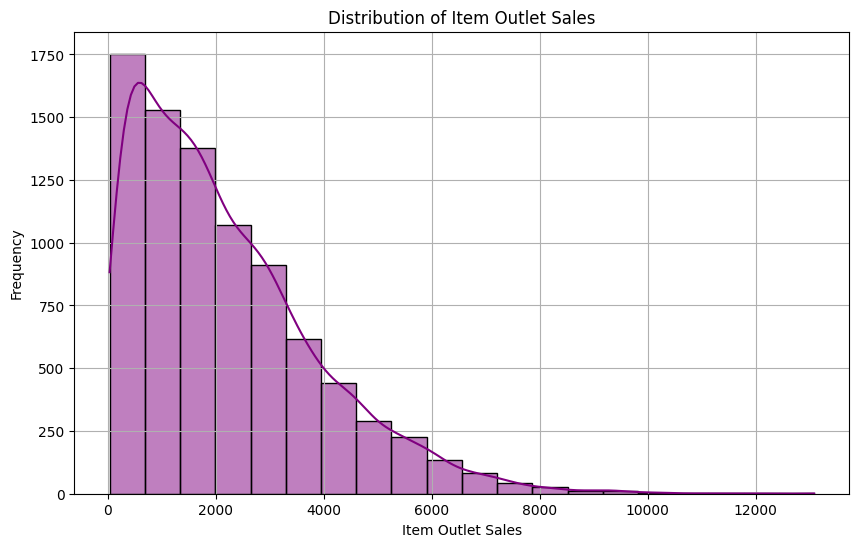

In [35]:
#create a histogram for Distribution of Item Outlet Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Outlet_Sales'], bins=20, kde=True, color='purple')
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- `The histogram of Item Outlet Sales indicates a distribution where the frequency of sales is highest at lower sales values and gradually decreases as the sales values increase. This pattern suggests that a significant portion of the sales falls within a lower range, with fewer occurrences of higher sales values.`

### Boxplot for Item_Weight

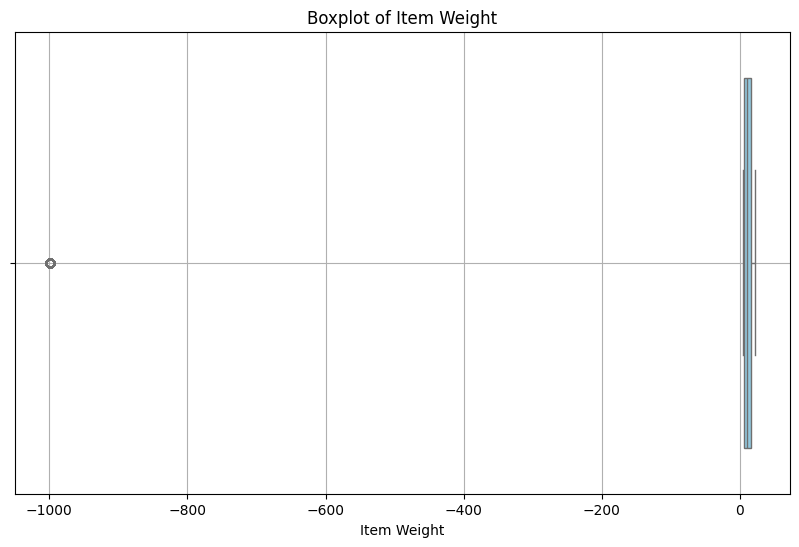

In [36]:
# Boxplot for Item_Weight
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Weight', data=df, color='skyblue')
plt.title('Boxplot of Item Weight')
plt.xlabel('Item Weight')
plt.grid(True)
plt.show()

-`box plot indicates that there isn't much variability in the weights of items.`

### Countplots to view the frequency of each class of categorial features

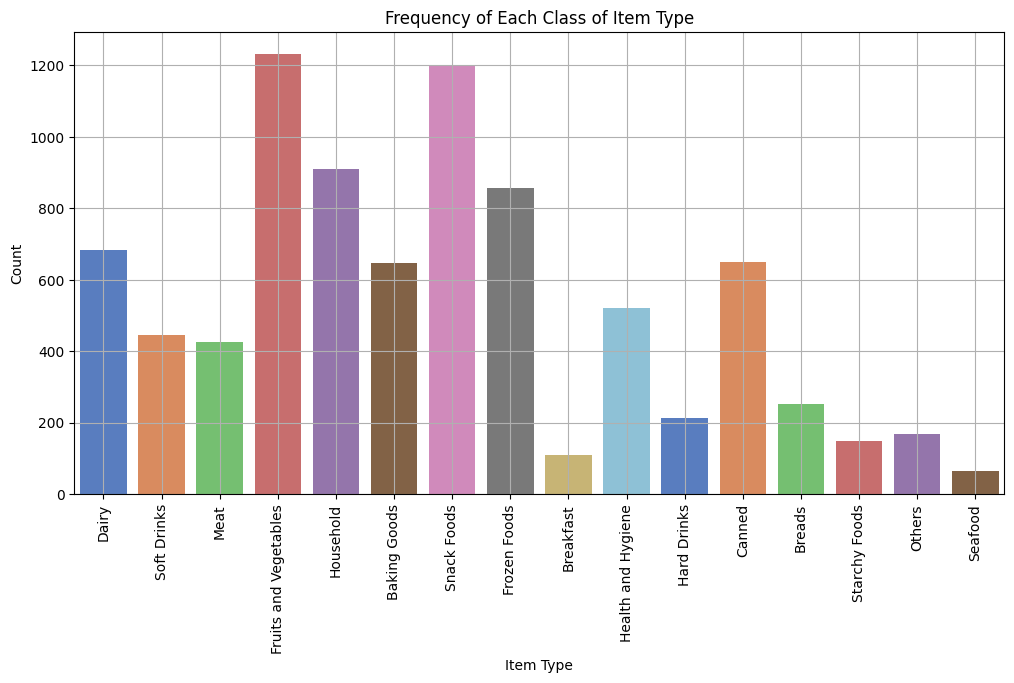

In [37]:
# Countplot for Item_Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Type', data=df, hue='Item_Type', palette='muted', legend=False)
plt.title('Frequency of Each Class of Item Type')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

`The countplot above provides insights into the distribution of different item types and their respective frequencies in the dataset. Fruits and vegetables stand out as the most prevalent item type, followed by snack foods and other common household items. On the other hand, seafood appears to be less frequently stocked or sold, indicating its lower popularity or availability in the outlets represented in the data`

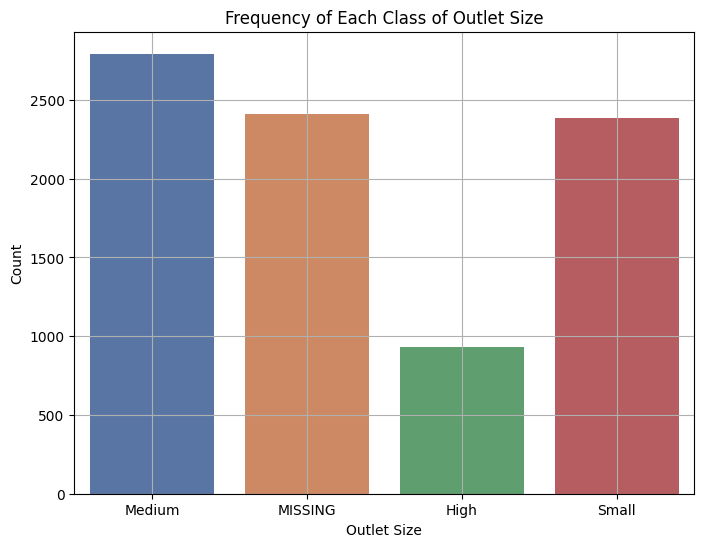

In [38]:
# Countplot for Outlet_Size
plt.figure(figsize=(8, 6))
sns.countplot(x='Outlet_Size', data=df, hue='Outlet_Size', palette='deep', legend=False)
plt.title('Frequency of Each Class of Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.grid(True)
plt.show()

`The above countplot provides insights into the distribution of outlet sizes and their respective frequencies in the dataset. Medium-sized outlets appear to be the most prevalent, followed by small-sized outlets, while high-sized outlets are the least common`

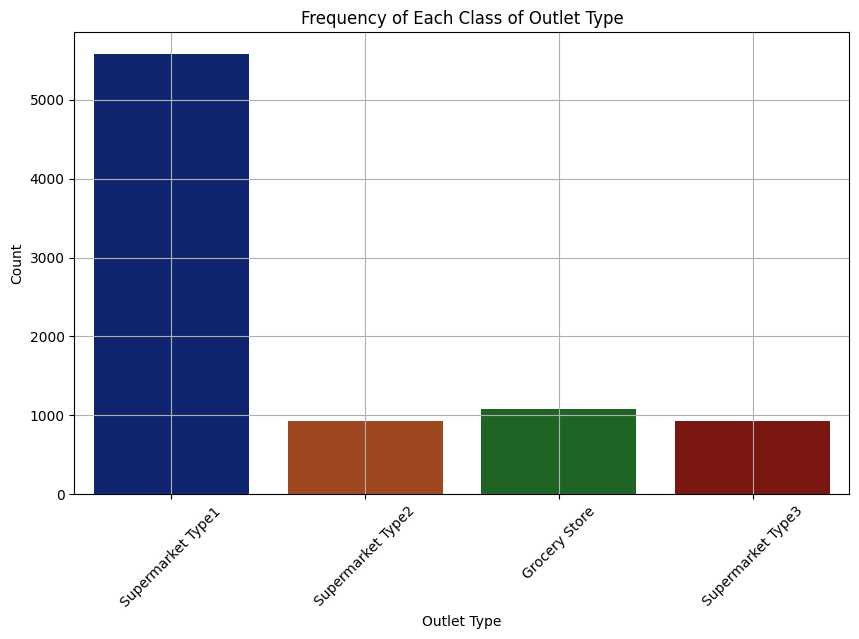

In [39]:
# Countplot for Outlet_Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Outlet_Type', data=df, hue='Outlet_Type', palette='dark', legend=False)
plt.title('Frequency of Each Class of Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

`The above countplot provides insights into the distribution of outlet types and their respective frequencies in the dataset. Supermarket Type 1 outlets appear to be the most prevalent, Grocery stores have a lower frequency but are still more common than Supermarket Type 2 and Type 3 outlets`

### Heatmap to view the correlation between features.

In [40]:
# Find correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.09,0.01,0.70,-0.08
Item_Visibility,-0.09,1.00,-0.00,-0.07,-0.13
Item_MRP,0.01,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.70,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.08,-0.13,0.57,-0.05,1.00


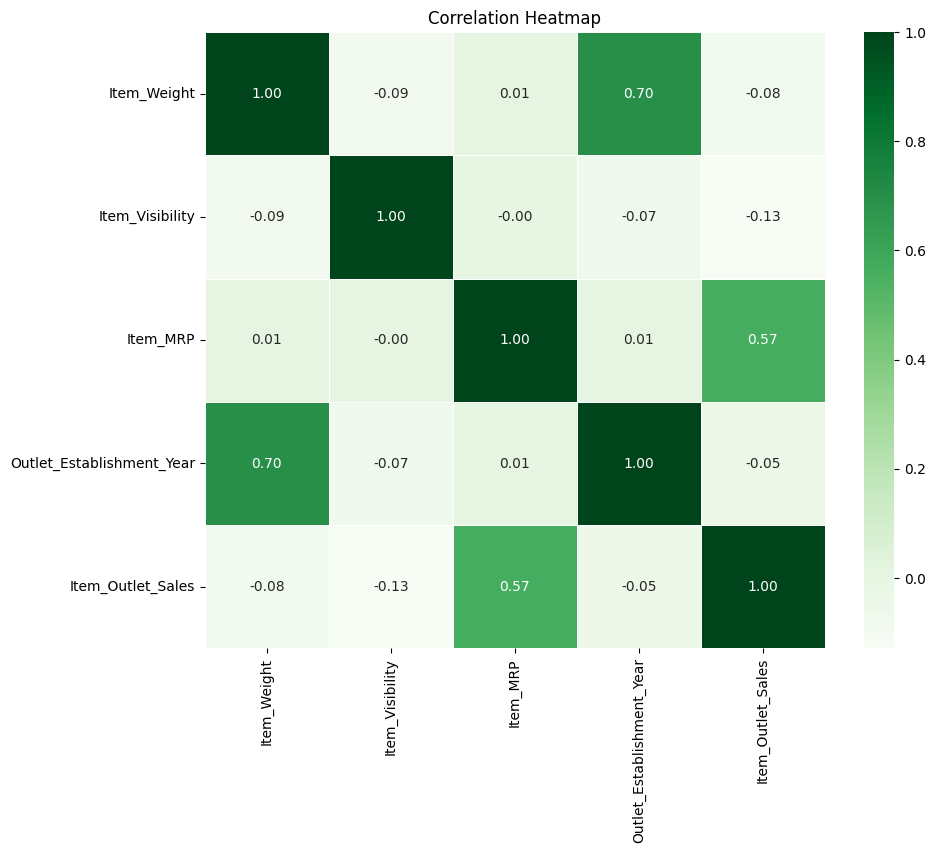

In [41]:
# Make a heatmap using the correlations from above
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='Greens', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Feature Inspection

In [43]:
# Remove the placeholders added in week 2 and replace them with null values
# Save list of float column names
float_columns = df.select_dtypes(include=['float']).columns.tolist()

# Define the placeholder value
placeholder_value = -999

# Replace the placeholder values with null values using boolean indexing
df[float_columns] = df[float_columns].where(df[float_columns] != placeholder_value, pd.NA)

# Confirm no more nulls using Pandas
null_counts_after_fill = df.isna().sum()
null_counts_after_fill



Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [44]:
#replace missing with null values
# Save list of categorical column names
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Replace 'MISSING' values with null values
df[categorical_columns] = df[categorical_columns].replace('MISSING', pd.NA)

# Confirm no more nulls using Pandas
null_counts_after_fill = df.isna().sum()
null_counts_after_fill


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Features Overview:

1. **Item_Identifier**: Product ID. (Object)
2. **Item_Weight**: Weight of product. (Float)
3. **Item_Fat_Content**: Whether the product is low-fat or regular. (Object)
4. **Item_Visibility**: The percentage of total display area of all products in a store allocated to the particular product. (Float)
5. **Item_Type**: The category to which the product belongs. (Object)
6. **Item_MRP**: Maximum Retail Price (list price) of the product. (Float)
7. **Outlet_Identifier**: Store ID. (Object)
8. **Outlet_Establishment_Year**: The year in which store was established. (Integer)
9. **Outlet_Size**: The size of the store in terms of ground area covered. (Object)
10. **Outlet_Location_Type**: The type of area in which the store is located. (Object)
11. **Outlet_Type**: Whether the outlet is a grocery store or some sort of supermarket. (Object)
12. **Item_Outlet_Sales**: Sales of the product in the particular store. This is the target variable to be predicted. (Float)


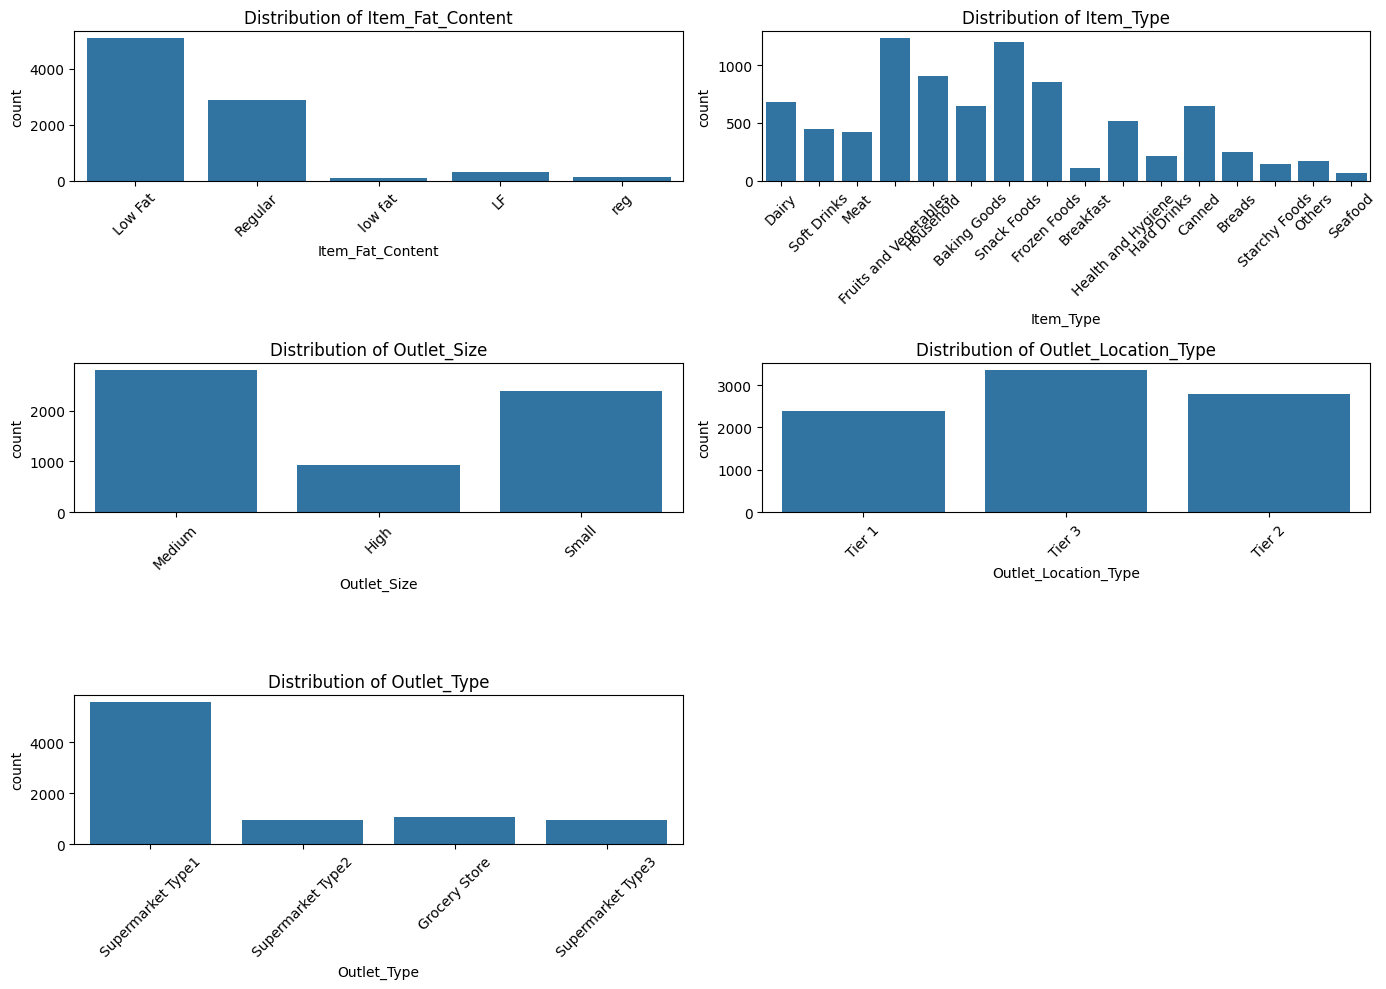

In [46]:
# Create a univariate visualization showing the distribution of values/categories
# Categorical features
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Plotting
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
